In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# Load all CSV files
data = pd.read_csv("C:/Users/asus/Downloads/GDO_data_wide_dirty.csv")      # Main dataset you will clean
metadata = pd.read_csv("C:/Users/asus/Documents/GDO_metadata.csv")         # Column meaning reference
missing = pd.read_csv("C:/Users/asus/Documents/GDO_missing.csv")           # Missing value report reference
units = pd.read_csv("C:/Users/asus/Documents/GDO_units.csv")               # Units reference for survival metrics

# Check shapes to confirm loaded
print(data.shape)
print(metadata.shape)
print(missing.shape)
print(units.shape)

# Show first rows of main dataset
data.head()


(46077, 177)
(177, 9)
(14, 3)
(11, 2)


,Cancer Site,Year,Tumour Type,Tumour Type 2,Tumour Type 3,Tumour Type 4,Tumour Type 5,Tumour Type 6,Tumour Type 7,Basis of Diagnosis,...,Net survival 84m UCI,Kaplan-Meier survival 84m,Kaplan-Meier survival 84m LCI,Kaplan-Meier survival 84m UCI,Net survival 96m,Net survival 96m LCI,Net survival 96m UCI,Kaplan-Meier survival 96m,Kaplan-Meier survival 96m LCI,Kaplan-Meier survival 96m UCI
0,testicular tumours including post-pubertal ter...,2020,Non-seminoma,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,.a,.a,.a,.a,NaN,.a,.a,.a,.a,.a
1,Head and neck,2013,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,58.2,48.8,47.8,49.9,55,53.6,56.5,45.8,44.7,46.8
2,NaN,2015,Skin cancer,Keratinocyte cancer,Squamous cell carcinoma (cSCC),All,Non-genital cSCC,First cSCC,Lower limb,Not split by Basis of Diagnosis,...,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
3,Haematological malignancies,2019,Myeloid,Myelodysplastic syndromes (MDS),Myelodysplastic syndromes (MDS) unclassifiable...,All,All,All,All,Not split by Basis of Diagnosis,...,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
4,Skin tumours,2016-2018,Skin cancer,UNK,Basal cell carcinoma (BCC),All,Non-genital BCC,First BCC,Trunk,Not split by Basis of Diagnosis,...,.a,.a,.a,.a,.a,.a,UNK,.a,.a,.a


In [2]:
data.shape
data.duplicated().sum()


np.int64(3413)

In [10]:
ata = data.drop_duplicates()
data.shape

(46077, 177)

In [11]:
data.isnull().sum().sort_values(ascending=False).head(20)


Other care percentage                  2747
Surgery and RT count                   2730
Other Outpatient percentage UCI        2716
Other Outpatient                       2710
Kaplan-Meier survival 96m LCI          2709
Stage Detail                           2708
Age Detail                             2708
Emergency Presentation percentage      2707
Net survival 06m LCI                   2707
Route not classified percentage UCI    2706
CT only percentage UCI                 2706
GP Referral percentage LCI             2705
Surgery and CT percentage LCI          2704
Net survival 24m LCI                   2703
Route not classified                   2702
Kaplan-Meier survival 84m UCI          2702
Surgery count                          2702
GP Referral percentage UCI             2701
Net survival 36m                       2701
Survival cohort size                   2701
dtype: int64

In [12]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['number']).columns

len(cat_cols), len(num_cols)


(177, 0)

In [13]:
data = data.replace(["UNK", "Unknown", "unknown", "UNKNOWN"], pd.NA)


In [14]:
data.isnull().sum().sort_values(ascending=False).head(10)


Cancer Site                        5179
Other care percentage              4137
Surgery and RT count               4118
Kaplan-Meier survival 96m LCI      4110
Survival cohort size               4108
Net survival 96m                   4100
Stage Detail                       4092
CT count                           4092
Other Outpatient percentage UCI    4090
Net survival 36m LCI               4090
dtype: int64

In [18]:
data = data.drop_duplicates()
print("✅ Shape after removing duplicates:", data.shape)


✅ Shape after removing duplicates: (42664, 177)


In [19]:
# Detect columns that look numeric but are stored as object
possible_numeric = []

for col in data.columns:
    # Try converting to numeric silently
    try:
        pd.to_numeric(data[col].dropna().sample(min(5, data[col].dropna().shape[0])), errors='raise')
        possible_numeric.append(col)
    except:
        pass

possible_numeric[:20]  # preview


['Incidence',
 'Population',
 'Incidence Rate',
 'Incidence Rate UCI',
 'Treatment cohort',
 'CT count',
 'CT percentage LCI',
 'CT percentage UCI',
 'RT percentage',
 'RT percentage LCI',
 'Surgery count',
 'CT only percentage',
 'Surgery only count',
 'CT and RT percentage',
 'CT and RT percentage UCI',
 'Surgery and CT count',
 'Surgery and RT percentage',
 'Surgery and CT and RT percentage',
 'Surgery and CT and RT percentage UCI',
 'Other care count']

In [20]:
for col in possible_numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [21]:
data = data.replace(["UNK", "Unknown", "unknown", "UNKNOWN"], pd.NA)


In [22]:
data['Cancer Site'] = (
    data['Cancer Site']
    .str.strip()
    .str.title()   # Breast cancer → Breast Cancer
)


In [23]:
data['Cancer Site'].unique()[:20]


array(['Testicular Tumours Including Post-Pubertal Teratomas',
       'Head And Neck', nan, 'Haematological Malignancies',
       'Skin Tumours', 'Bladder, Urethra, Renal Pelvis And Ureter',
       'Ovary, Fallopian Tube And Primary Peritoneal Carcinomas',
       'Brain, Meningeal And Other Primary Cns Tumours', 'Pancreas', <NA>,
       'Lung, Mesothelioma, And Other Thoracic', 'Kidney', 'Prostate',
       'Oesophageal And Stomach', 'Liver And Biliary Tract', 'Sarcoma',
       'Eye Cancer', 'Haematological Malignancy Transformations',
       'Bone Cancer', 'Kaposi Sarcoma'], dtype=object)

In [24]:
# Drop tumour subtype columns with >80% missing
threshold = 0.8
missing_fraction = data.isnull().mean()
cols_to_drop = missing_fraction[missing_fraction > threshold].index
data = data.drop(columns=cols_to_drop)
print("✅ Dropped columns:", len(cols_to_drop))


✅ Dropped columns: 0


In [26]:
treatment_cols = [col for col in data.columns if "count" in col.lower()]
for col in treatment_cols:
    data[col] = data[col].fillna(0)


In [28]:
data.shape
data['Cancer Site'].unique()[:10]
len(cols_to_drop)
len(treatment_cols)


11

In [29]:
# ✅ REMOVE DUPLICATES
before = data.shape
data = data.drop_duplicates()
after = data.shape

print("✅ Duplicates Removed:")
print("Before:", before, "→ After:", after)


# ✅ CONVERT STRING NUMBERS BACK TO NUMERIC (Safe Conversion)
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')


# ✅ REPLACE UNK & UNKNOWN WITH REAL MISSING VALUES
data = data.replace(["UNK", "Unknown", "unknown", "UNKNOWN"], pd.NA)


# ✅ STANDARDIZE CANCER SITE NAMES
data['Cancer Site'] = (
    data['Cancer Site']
    .astype(str)
    .str.strip()
    .str.title()   # Example: breast cancer → Breast Cancer
)


# ✅ FIND COLUMNS WITH HIGH MISSING % ( >80% )
missing_fraction = data.isnull().mean()
cols_to_drop = missing_fraction[missing_fraction > 0.80].index
data = data.drop(columns=cols_to_drop)


# ✅ FILL TREATMENT COUNT COLUMNS WITH 0
treatment_cols = [col for col in data.columns if "count" in col.lower()]
for col in treatment_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)


# ✅ PRINT RESULTS YOU NEED
print("\n✅ New Dataset Shape:", data.shape)
print("\n✅ First 10 Cancer Site Labels:", data['Cancer Site'].unique()[:10])
print("\n✅ Number of Dropped Columns:", len(cols_to_drop))
print("\n✅ Number of Treatment Count Columns:", len(treatment_cols))


✅ Duplicates Removed:
Before: (42664, 177) → After: (42664, 177)


C:\Users\asus\AppData\Local\Temp\ipykernel_7836\4146441868.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')



✅ New Dataset Shape: (42664, 177)

✅ First 10 Cancer Site Labels: ['Testicular Tumours Including Post-Pubertal Teratomas' 'Head And Neck'
 'Nan' 'Haematological Malignancies' 'Skin Tumours'
 'Bladder, Urethra, Renal Pelvis And Ureter'
 'Ovary, Fallopian Tube And Primary Peritoneal Carcinomas'
 'Brain, Meningeal And Other Primary Cns Tumours' 'Pancreas' '<Na>']

✅ Number of Dropped Columns: 0

✅ Number of Treatment Count Columns: 11


In [30]:
data['Cancer Site'] = data['Cancer Site'].replace(['Nan', '<Na>', '<NA>', 'na', 'NA'], pd.NA)


In [31]:
data['Cancer Site'] = (
    data['Cancer Site']
    .astype(str)
    .str.strip()
    .str.title()
)


In [32]:
tumour_cols = [col for col in data.columns if "Tumour" in col]
for col in tumour_cols:
    data[col] = data[col].astype(str).str.strip().str.title()


In [33]:
before = data.shape
data = data.drop_duplicates()
after = data.shape

print("Before:", before, "→ After:", after)


Before: (42664, 177) → After: (42664, 177)


In [35]:
survival_cols = [col for col in data.columns if 
                 "survival" in col.lower() or "kaplan" in col.lower()]

for col in survival_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [36]:
data[survival_cols].dtypes.head(15)


Survival cohort size             float64
Net survival 03m                 float64
Net survival 03m LCI             float64
Net survival 03m UCI             float64
Kaplan-Meier survival 03m        float64
Kaplan-Meier survival 03m LCI    float64
Kaplan-Meier survival 03m UCI    float64
Net survival 06m                 float64
Net survival 06m LCI             float64
Net survival 06m UCI             float64
Kaplan-Meier survival 06m        float64
Kaplan-Meier survival 06m LCI    float64
Kaplan-Meier survival 06m UCI    float64
Net survival 09m                 float64
Net survival 09m LCI             float64
dtype: object

In [37]:
print("✅ Final Dataset Shape:", data.shape)
print("✅ Unique Cancer Sites:", len(data['Cancer Site'].unique()))
print("✅ Example Cancer Sites:", data['Cancer Site'].unique()[:10])
print("✅ Survival Columns Converted:", len(survival_cols))


✅ Final Dataset Shape: (42664, 177)
✅ Unique Cancer Sites: 20
✅ Example Cancer Sites: ['Testicular Tumours Including Post-Pubertal Teratomas' 'Head And Neck'
 '<Na>' 'Haematological Malignancies' 'Skin Tumours'
 'Bladder, Urethra, Renal Pelvis And Ureter'
 'Ovary, Fallopian Tube And Primary Peritoneal Carcinomas'
 'Brain, Meningeal And Other Primary Cns Tumours' 'Pancreas'
 'Lung, Mesothelioma, And Other Thoracic']
✅ Survival Columns Converted: 67


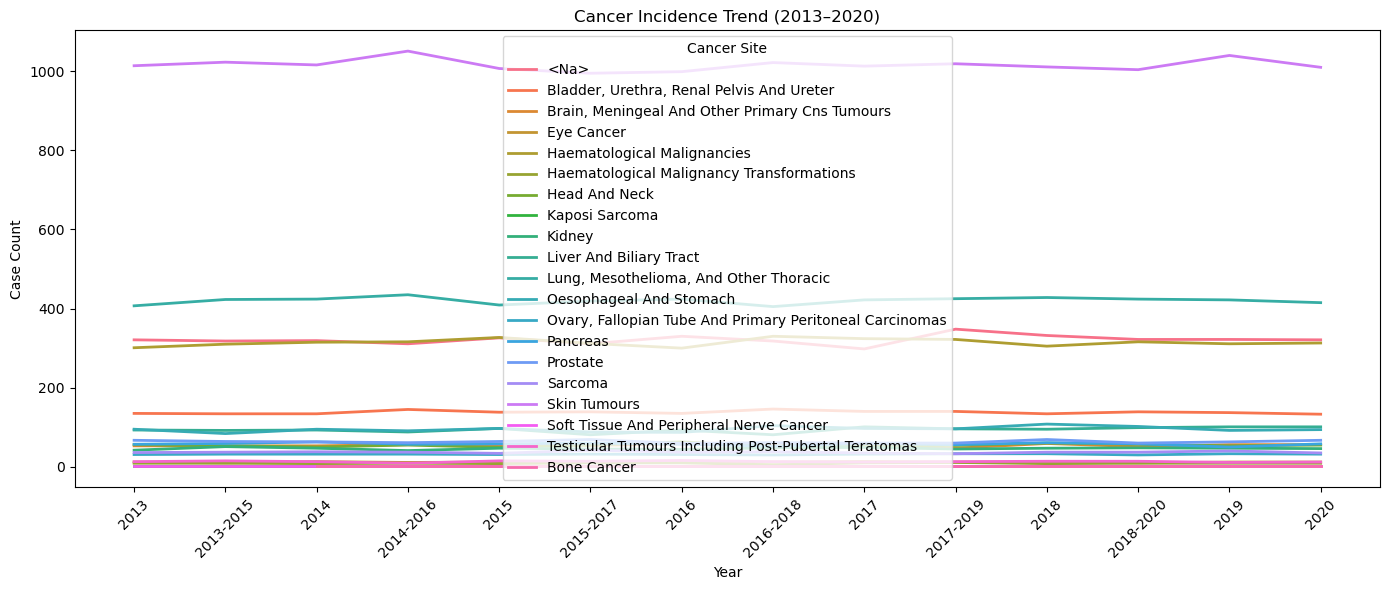

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year and Cancer Site, compute case count
trend_data = data.groupby(["Year", "Cancer Site"]).size().reset_index(name="Case Count")

plt.figure(figsize=(14,6))
sns.lineplot(data=trend_data, x="Year", y="Case Count", hue="Cancer Site", linewidth=2)
plt.title("Cancer Incidence Trend (2013–2020)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
top5 = data["Cancer Site"].value_counts().head(5)
print(top5)


Cancer Site
Skin Tumours                                 15593
Lung, Mesothelioma, And Other Thoracic        6433
<Na>                                          4906
Haematological Malignancies                   4861
Bladder, Urethra, Renal Pelvis And Ureter     2095
Name: count, dtype: int64


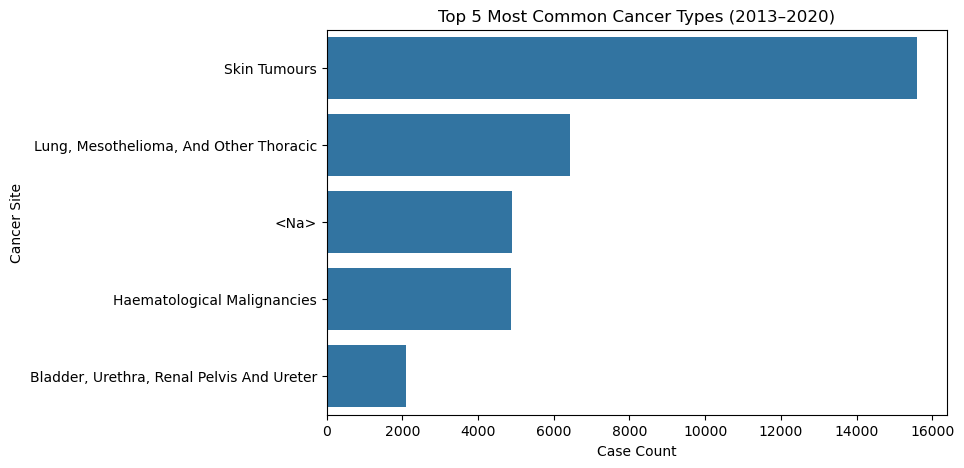

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x=top5.values, y=top5.index)
plt.title("Top 5 Most Common Cancer Types (2013–2020)")
plt.xlabel("Case Count")
plt.ylabel("Cancer Site")
plt.show()


In [41]:
survival_5yr = data.groupby("Cancer Site")["Net survival 60m"].mean().sort_values()

low_survival = survival_5yr.head(5)
high_survival = survival_5yr.tail(5)


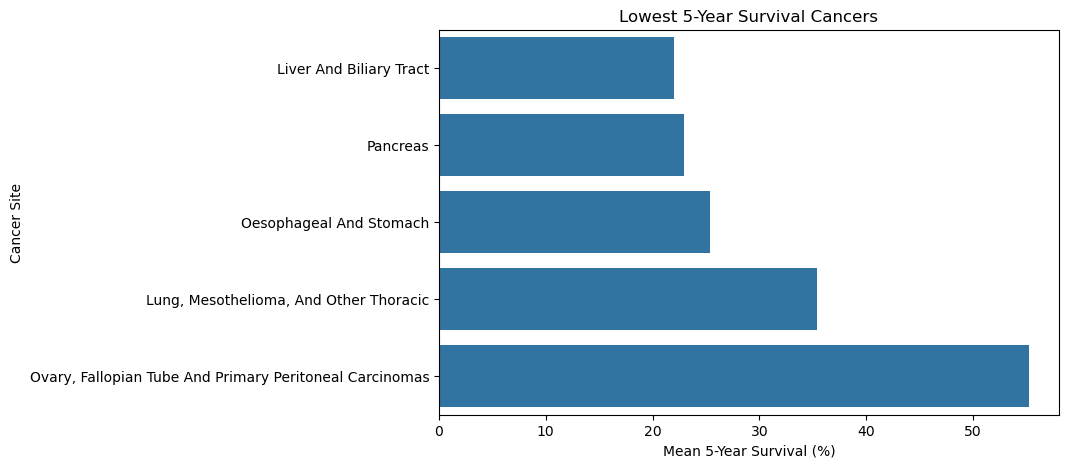

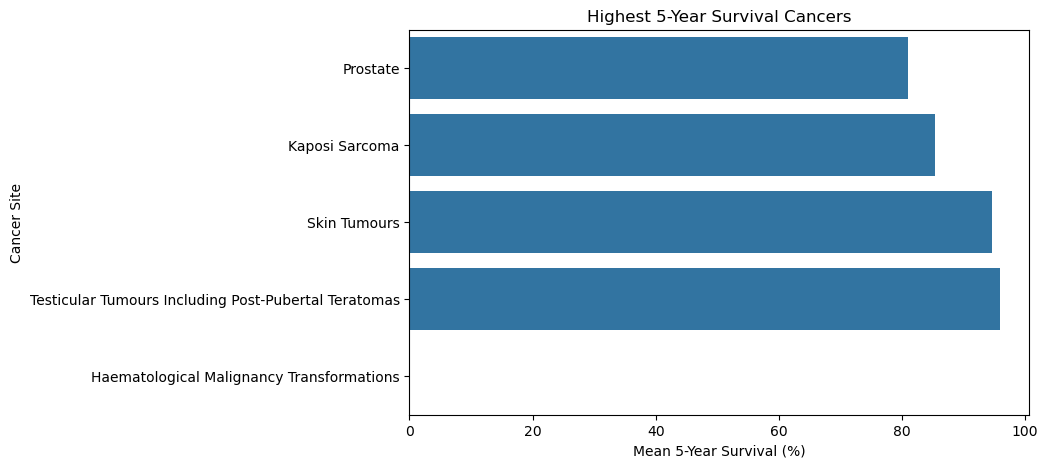

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x=low_survival.values, y=low_survival.index)
plt.title("Lowest 5-Year Survival Cancers")
plt.xlabel("Mean 5-Year Survival (%)")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=high_survival.values, y=high_survival.index)
plt.title("Highest 5-Year Survival Cancers")
plt.xlabel("Mean 5-Year Survival (%)")
plt.show()


In [2]:
import pandas as pd

# Load all CSV files
data = pd.read_csv("C:/Users/asus/Downloads/GDO_data_wide_dirty.csv")      # Main dataset you will clean
metadata = pd.read_csv("C:/Users/asus/Documents/GDO_metadata.csv")         # Column meaning reference
missing = pd.read_csv("C:/Users/asus/Documents/GDO_missing.csv")           # Missing value report reference
units = pd.read_csv("C:/Users/asus/Documents/GDO_units.csv")               # Units reference for survival metrics

# Check shapes to confirm loaded
print(data.shape)
print(metadata.shape)
print(missing.shape)
print(units.shape)

# Show first rows of main dataset
data.head()


(46077, 177)
(177, 9)
(14, 3)
(11, 2)


,Cancer Site,Year,Tumour Type,Tumour Type 2,Tumour Type 3,Tumour Type 4,Tumour Type 5,Tumour Type 6,Tumour Type 7,Basis of Diagnosis,...,Net survival 84m UCI,Kaplan-Meier survival 84m,Kaplan-Meier survival 84m LCI,Kaplan-Meier survival 84m UCI,Net survival 96m,Net survival 96m LCI,Net survival 96m UCI,Kaplan-Meier survival 96m,Kaplan-Meier survival 96m LCI,Kaplan-Meier survival 96m UCI
0,testicular tumours including post-pubertal ter...,2020,Non-seminoma,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,.a,.a,.a,.a,NaN,.a,.a,.a,.a,.a
1,Head and neck,2013,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,58.2,48.8,47.8,49.9,55,53.6,56.5,45.8,44.7,46.8
2,NaN,2015,Skin cancer,Keratinocyte cancer,Squamous cell carcinoma (cSCC),All,Non-genital cSCC,First cSCC,Lower limb,Not split by Basis of Diagnosis,...,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
3,Haematological malignancies,2019,Myeloid,Myelodysplastic syndromes (MDS),Myelodysplastic syndromes (MDS) unclassifiable...,All,All,All,All,Not split by Basis of Diagnosis,...,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
4,Skin tumours,2016-2018,Skin cancer,UNK,Basal cell carcinoma (BCC),All,Non-genital BCC,First BCC,Trunk,Not split by Basis of Diagnosis,...,.a,.a,.a,.a,.a,.a,UNK,.a,.a,.a


In [3]:
[col for col in data.columns if "60m" in col]


['Net survival 60m',
 'Net survival 60m LCI',
 'Net survival 60m UCI',
 'Kaplan-Meier survival 60m',
 'Kaplan-Meier survival 60m LCI',
 'Kaplan-Meier survival 60m UCI']

In [9]:
# Convert Net survival 60m to numeric
data['Net survival 60m'] = pd.to_numeric(data['Net survival 60m'], errors='coerce')



In [10]:
data_model = data.copy()

# 1 = high survival (≥ 50%), 0 = low survival (< 50%)
data_model['Survived_5yr'] = (data_model['Net survival 60m'] >= 50).astype(int)

data_model['Survived_5yr'].value_counts()


Survived_5yr
0    37579
1     8498
Name: count, dtype: int64

In [11]:
# Select predictor columns
features = [
    'Cancer Site', 
    'Tumour Type', 
    'Basis of Diagnosis'
]

# Add treatment count columns automatically
features += [col for col in data_model.columns if "count" in col.lower()]

X = data_model[features]
y = data_model['Survived_5yr']

X.head(), y.head()


(                                         Cancer Site   Tumour Type  \
 0  testicular tumours including post-pubertal ter...  Non-seminoma   
 1                                      Head and neck           All   
 2                                                NaN   Skin cancer   
 3                        Haematological malignancies       Myeloid   
 4                                       Skin tumours   Skin cancer   
 
                 Basis of Diagnosis CT count RT count Surgery count  \
 0  Not split by Basis of Diagnosis      350      UNK           624   
 1  Not split by Basis of Diagnosis      NaN      UNK          4972   
 2  Not split by Basis of Diagnosis        0        3           165   
 3  Not split by Basis of Diagnosis      270       17            .m   
 4  Not split by Basis of Diagnosis        8       13          1012   
 
   CT only count RT only count Surgery only count CT and RT count  \
 0            19             0                297               4   
 1    

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns

preprocess = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('numeric', 'passthrough', num_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression

log_reg_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=2000))
])

log_reg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Cancer Site', 'Tumour Type', 'Basis of Diagnosis', 'CT count',
       'RT count', 'Surgery count', 'CT only count', 'RT only count',
       'Surgery only count', 'CT and RT count', 'Surgery and CT count',
       'Surgery and RT count', 'Surgery and CT and RT count',
       'Other care count'],
      dtype='object')),
                                                 ('numeric', 'passthrough',
                                                  Index([], dtype='object'))])),
                ('model', LogisticRegression(max_iter=2000))])

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_reg_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8110894097222222

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7556
           1       0.44      0.17      0.25      1660

    accuracy                           0.81      9216
   macro avg       0.64      0.56      0.57      9216
weighted avg       0.77      0.81      0.78      9216


Confusion Matrix:
 [[7185  371]
 [1370  290]]


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(n_estimators=250, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


RF Accuracy: 0.8366970486111112

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      7556
           1       0.77      0.13      0.23      1660

    accuracy                           0.84      9216
   macro avg       0.80      0.56      0.57      9216
weighted avg       0.83      0.84      0.79      9216

